# From ROC space to the Tile

In [1]:
%matplotlib tk

import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton
from matplotlib.widgets import Slider

from sorbetto.annotation import AnnotationIsovalueCurves
from sorbetto.flavor import ValueFlavor
from sorbetto.parameterization import ParameterizationDefault
from sorbetto.performance import TwoClassClassificationPerformance
from sorbetto.tile import ValueTile

In [2]:
# Set initial values
prior = 0.5
fpr, tpr = 0.5, 0.5
parameterization = ParameterizationDefault()

# Draw colorbar only once
draw_cbar = True


# Compute a performance from a given prior, tpr, fpr
def performance_from_roc(prior, tpr, fpr):
    tn = (1 - prior) * (1 - fpr)
    fp = (1 - prior) * fpr
    fn = prior * (1 - tpr)
    tp = prior * tpr
    return TwoClassClassificationPerformance(tn, fp, fn, tp)


# Draw a ROC and a value tile from a given prior, tpr, fpr
def draw_perf(fig, axes, prior, tpr, fpr):
    global draw_cbar

    performance = performance_from_roc(prior, tpr=tpr, fpr=fpr)
    flavor = ValueFlavor(performance=performance)
    tile = ValueTile(parameterization=parameterization, flavor=flavor)
    tile.disable_colorbar = not draw_cbar

    isolines_annotation = AnnotationIsovalueCurves()
    tile.appendAnnotation(isolines_annotation)

    roc_ax, tile_ax = axes
    tile.draw(fig, tile_ax)
    performance.drawInROC(fig, roc_ax)
    draw_cbar = False


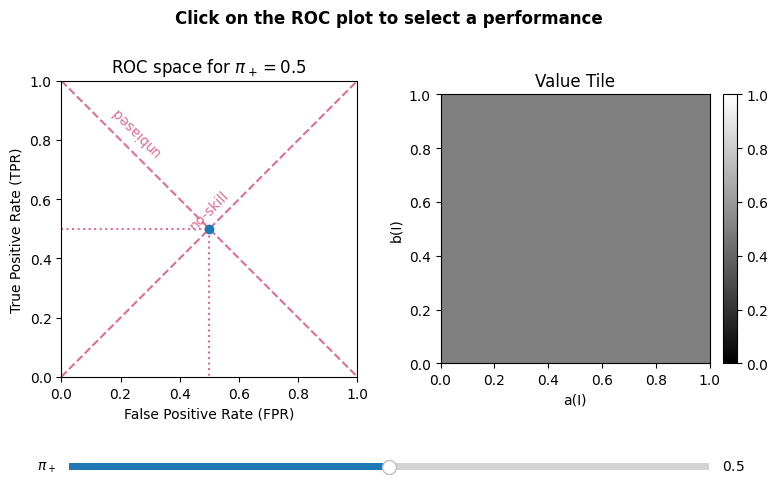

In [3]:
# Create the initial figure
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
draw_perf(fig, axes, prior, tpr, fpr)
fig.suptitle("Click on the ROC plot to select a performance", fontweight="bold")
fig.tight_layout(pad=1.5)
axslide = fig.add_axes([0.1, 0.05, 0.8, 0.03])
slider = Slider(ax=axslide, label=r"$\pi_+$", valmin=0, valmax=1, valinit=prior)
fig.subplots_adjust(bottom=0.2)


# Update when clicking the ROC plot
def update_click(event):
    if event.inaxes != axes[0]:
        return
    elif event.button is MouseButton.LEFT:
        global fpr, tpr
        fpr, tpr = event.xdata, event.ydata

        for ax in axes:
            ax.clear()
        draw_perf(fig, axes, prior, tpr, fpr)
        plt.show()


# Update when moving the prior slider
def update_slider(val):
    global prior
    prior = val

    for ax in axes:
        ax.clear()
    draw_perf(fig, axes, prior, tpr, fpr)
    plt.show()


plt.connect("button_press_event", update_click)
slider.on_changed(update_slider)
plt.show()
fig